# OKCupid - Regression & Classification

In [5]:
#İmporting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
##from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("profiles.csv")

### EDA

In [7]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [8]:
df.sample(7)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
12924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.duplicated().sum()

51037

In [10]:
#tekrar eden veriler çok onları drop etmeliyiz
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(9515, 31)

In [13]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
essay0          848
essay1         1168
essay2         1466
essay3         1825
essay4         1636
essay5         1701
essay6         2163
essay7         1962
essay8         3154
essay9         1961
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes          919
speaks            7
status            1
dtype: int64

In [14]:
df.describe() #min:18 max:110

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [15]:
df.corr() #gelir ile kilonun çok alakası var :)

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9515 entries, 0 to 9514
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job   

### Feature Engineering

In [17]:
#regression ve classification için boşlukları doldurmalı ve objectleri inte ve floata cevirmeliyiz

In [18]:
silinebilir=['essay0',  'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df.drop(silinebilir, inplace=True, axis=1)

In [19]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [20]:
df.last_online.value_counts().sort_values(ascending=False)

2012-06-29-22-56    15
2012-06-29-22-35    11
2012-06-29-22-58    11
2012-06-29-22-33    11
2012-06-29-22-55    10
                    ..
2012-06-07-15-29     1
2012-06-24-18-11     1
2012-04-08-08-37     1
2012-06-29-16-00     1
2012-06-14-15-14     1
Name: last_online, Length: 6763, dtype: int64

In [21]:
df.last_online.describe()

count                 9514
unique                6763
top       2012-06-29-22-56
freq                    15
Name: last_online, dtype: object

In [22]:
df.isnull().mean().sort_values(ascending=False) #boş verilerin yüzdesi büyükten küçüğe

offspring      0.591592
diet           0.394535
religion       0.341986
pets           0.332422
drugs          0.241724
sign           0.182764
job            0.139989
education      0.110983
ethnicity      0.099842
smokes         0.096584
body_type      0.089228
drinks         0.052864
speaks         0.000736
age            0.000105
sex            0.000105
last_online    0.000105
orientation    0.000105
location       0.000105
income         0.000105
height         0.000105
status         0.000105
dtype: float64

In [23]:
#gerek olmadığını düşünüp siliyoruz
del df["sign"]

In [24]:
df.sample(7)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,smokes,speaks,status
4797,37.0,thin,NaN,socially,NaN,graduated from masters program,white,75.0,-1.0,executive / management,2012-06-15-21-58,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,NaN,m,no,"english (okay), spanish (okay), french (poorly)",single
182,27.0,curvy,anything,often,never,graduated from college/university,white,68.0,-1.0,sales / marketing / biz dev,2012-06-29-21-59,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",straight,likes dogs and has cats,agnosticism and laughing about it,f,no,"english (fluently), spanish (okay)",single
8083,39.0,average,anything,NaN,NaN,graduated from college/university,white,72.0,-1.0,entertainment / media,2011-12-08-09-47,"san francisco, california",NaN,straight,likes dogs,NaN,m,NaN,"english (fluently), spanish (fluently), french...",single
4709,26.0,athletic,mostly anything,socially,never,working on college/university,white,71.0,-1.0,student,2012-06-25-17-22,"burlingame, california",doesn&rsquo;t have kids,straight,has dogs,catholicism but not too serious about it,m,no,english,single
7850,42.0,athletic,mostly anything,socially,never,graduated from two-year college,white,65.0,-1.0,artistic / musical / writer,2012-06-29-15-39,"san francisco, california","has a kid, and might want more",straight,likes dogs and likes cats,other,f,no,english (fluently),single
163,37.0,athletic,NaN,socially,NaN,graduated from med school,NaN,66.0,-1.0,medicine / health,2012-06-22-23-43,"san francisco, california",NaN,straight,NaN,NaN,f,NaN,"english, spanish, persian",single
6283,26.0,average,mostly anything,socially,NaN,NaN,middle eastern,73.0,-1.0,other,2012-06-29-23-20,"san francisco, california",NaN,straight,NaN,other and laughing about it,m,no,"english, farsi (okay)",single


In [25]:
### Sadeleştirme

In [26]:
df.drinks.value_counts().sort_values(ascending=False)

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

In [27]:
df.drugs.value_counts().sort_values(ascending=False)

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

In [28]:

df.smokes.value_counts().sort_values(ascending=False)

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [29]:
df["drinks"]=df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})
df["drugs"] = df["drugs"].map({"never":0, "sometimes":1, "often":2})
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})

In [30]:
df["drinks"] = df["drinks"].fillna("0")
df["drugs"] = df["drugs"].fillna("0")
df["smokes"] = df["smokes"].fillna("0")

In [31]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks            0
drugs             0
education      1056
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
smokes            0
speaks            7
status            1
dtype: int64

In [32]:
df.body_type.value_counts().sort_values(ascending=False)

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [33]:
new_body_type={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(new_body_type,inplace=True)

In [34]:
df.diet.value_counts().sort_values(ascending=False)

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
other                    52
mostly vegan             52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [35]:
df['diet']=df.diet.replace({'mostly':'', 'strictly':''}, regex=True).str.strip()

In [36]:
df.education.value_counts().sort_values(ascending=False)

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
graduated from med school              73
working on space camp                  73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [37]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)

In [38]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks            0
drugs             0
education      1056
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
smokes            0
speaks            7
status            1
dtype: int64

In [39]:
df.job.value_counts().sort_values(ascending=False)

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

<Axes: >

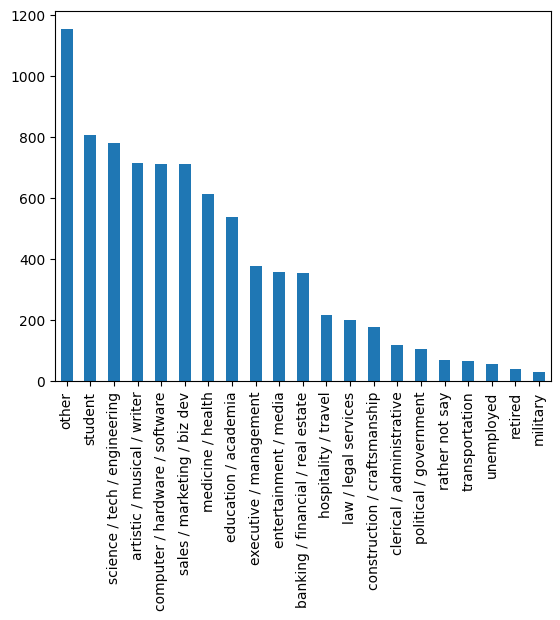

In [40]:
df["job"].value_counts().plot.bar()

In [41]:
df["religion"]=df["religion"].str.split().str[0]

In [42]:
df.religion.value_counts().sort_values(ascending=False)

agnosticism     1381
other           1193
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

<Axes: >

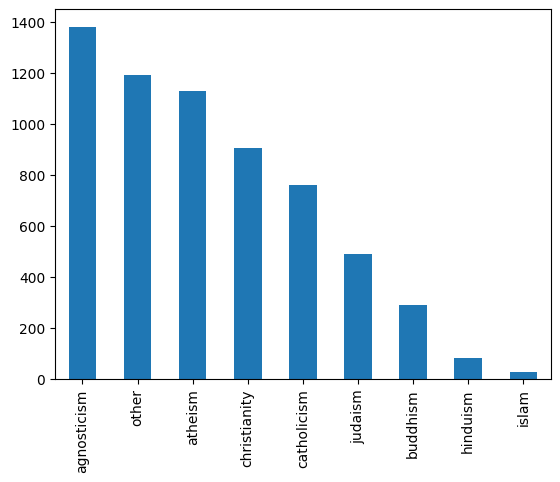

In [43]:
df["religion"].value_counts().plot.bar()

In [44]:
#streye çevirmede önemli olan başka dili konuşup konuşmadığı yoksa ne konuştuğu değil
df['speaks']=df.speaks.apply(lambda x: len(x.split(',')) if isinstance(x, str) else np.nan)

In [45]:
df['speaks'].fillna(df.speaks.median(), inplace=True) #speak ortalama değerle doldurduk

In [46]:
#hayvanın türü değil sahip olup olmadığı çnemli
df['has_animals'] = df.pets.str.contains('has')

In [47]:
df.pets.str.contains('1', na=True)

0       False
1       False
2       False
3       False
4       False
        ...  
9510     True
9511    False
9512    False
9513    False
9514     True
Name: pets, Length: 9515, dtype: bool

In [48]:
#çocuğa sahip mi değil mi
df['has_kids'] = df.offspring.str.contains('has')

In [49]:
df.offspring.str.contains('1', na=True)

0       False
1       False
2        True
3       False
4        True
        ...  
9510     True
9511    False
9512    False
9513     True
9514     True
Name: offspring, Length: 9515, dtype: bool

In [50]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,smokes,speaks,status,has_animals,has_kids
7540,25.0,fit,NaN,2.0,0,graduated,white,72.0,-1.0,banking / financial / real estate,2012-06-11-22-20,"walnut creek, california",NaN,straight,NaN,NaN,m,0,3.0,single,NaN,NaN


In [51]:
#classification için jenerasyon sutunu tanımlayıp, ekliyoruz

In [52]:
# 0: Millenial: 18-32, Gen X-er: 33-47, Boomers:48-70
df.loc[df[df.age<=70].index, 'generation'] = 'Boomers'
df.loc[df[df.age<=47].index, 'generation'] = 'Gen X-er'
df.loc[df[df.age<=32].index, 'generation'] = 'Millennial'

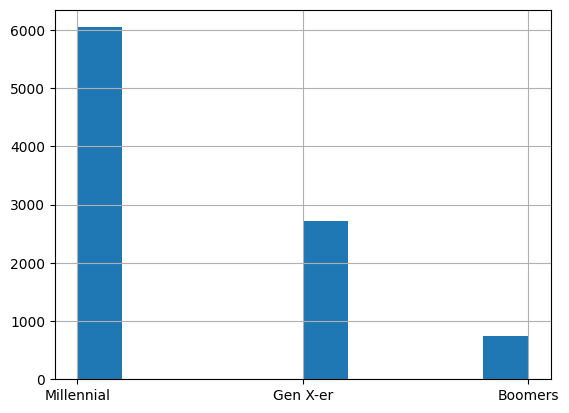

In [53]:
df.generation.hist();

In [54]:
#bir veri çerçevesindeki tüm NaN (boş) değerleri her sütundaki en yaygın değerle doldurmak için kullanılır
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

## Modelling

In [55]:
reg_model=pd.get_dummies(df,drop_first=True)

In [56]:
x,y=reg_model.drop("age",axis=1),df[["age"]]

In [57]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor

    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()

    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    return result.sort_values('R_Squared',ascending=False)

In [58]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,8.520959e-01,3.533631,2.912801
Ridge,8.362945e-01,3.717600,3.052206
ExtraTreeRegressor,7.185129e-01,4.874839,3.776668
Lasso,5.844988e-01,5.922664,4.134784
KNeighborsRegressor,4.520047e-01,6.801731,4.597162
ElasticNet,3.305060e-01,7.518035,5.195501
LinearRegression,-1.005782e+09,291395.510378,14728.139854


In [59]:
#Pycaret Regression
#from pycaret.regression import *
#setup(df,target='age')

In [60]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()

    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']

    accuracy_scored=[]


    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)

        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))

    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [61]:
#tanımla

In [62]:
df['generation'].replace('Boomers',0,inplace=True)
df['generation'].replace('Gen X-er',1,inplace=True)
df['generation'].replace('Millennial',2,inplace=True)

In [63]:
y=df[["generation"]]

In [64]:
class_model=df.drop(["generation","age"],axis=1)

In [65]:
x=pd.get_dummies(class_model,drop_first=True)

In [66]:
fnc_all_classification_models(x,y)

,accuracy_score
XGBClassifier,0.677877
RandomForestClassifier,0.676301
BernoulliNB,0.665265
SVC,0.638991
GaussianNB,0.633736
LogisticRegression,0.633736
DecisionTreeClassifier,0.612717
KNeighborsClassifier,0.598529


In [67]:
#!pip install pycaret

In [68]:
# Pycaret Classification
#df=df.drop('age',axis=1)

In [69]:
#from pycaret.classification import *
#setup(df,target='epoch')

In [70]:
#best_model=compare_models()